In [48]:
import pandas as pd
from nltk.stem import *
from nltk.stem.porter import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from model_functions import (remove_non_engl_word,
                       text_processing,
                       processing_with_lemmatisation,
                       processing_with_stemming,
                       to_lowercase,
                       remove_sp_char,
                       analyze_sentiment,
                       add_labels,                       
                       tokenization,
                       lemmatize,
                       remove_num,
                       remove_stopword,
                       remove_short_tokens
                       )
import nltk
from nltk.corpus import stopwords

In [49]:
# Initialize the stopwords
nltk.download('stopwords')
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EAndreas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
df_telecome = pd.read_csv('../data/telecome_facebook_comments.csv')
df_mtc = pd.read_csv('../data/mtc_facebook_comments.csv')
df_paratus = pd.read_csv('../data/paratus_facebook_comments.csv')

<h4>1. Data Cleaning</h4>
The following steps were taken throught the Data Cleaning process
<ul>
<li>Removing empty records</li>
<li>Converting text to lowercase</li>
<li>Removing all irrelevant characters</li>
<li>Removing stopwords</li>
<li>Stemming</li>
<li>Lemmatization</li>
</ul>
</br>

In [51]:
# Removing empty records
df_telecome_new = df_telecome[df_telecome['comment_content'].notnull()]
df_mtc_new = df_mtc[df_mtc['comment_content'].notnull()]
df_paratus_new = df_paratus[df_paratus['comment_content'].notnull()]

In [52]:
# Converting text to lowecase
df_telecome_new.loc[:,'comment_content'] = df_telecome_new['comment_content'].apply(to_lowercase)
df_mtc_new.loc[:,'comment_content'] = df_mtc_new['comment_content'].apply(to_lowercase)
df_paratus_new.loc[:,'comment_content'] = df_paratus_new['comment_content'].apply(to_lowercase)

C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\4197593461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telecome_new.loc[:,'comment_content'] = df_telecome_new['comment_content'].apply(to_lowercase)
C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\4197593461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mtc_new.loc[:,'comment_content'] = df_mtc_new['comment_content'].apply(to_lowercase)
C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\4197593461.py:4: SettingWithCopyWarning: 

In [53]:
# Removing non-english words function
df_telecome_new.loc[:,'comment_content'] = df_telecome_new['comment_content'].apply(remove_non_engl_word)
df_mtc_new.loc[:,'comment_content'] = df_mtc_new['comment_content'].apply(remove_non_engl_word)
df_paratus_new.loc[:,'comment_content'] = df_paratus_new['comment_content'].apply(remove_non_engl_word)

C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\1742616172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telecome_new.loc[:,'comment_content'] = df_telecome_new['comment_content'].apply(remove_non_engl_word)
C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\1742616172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mtc_new.loc[:,'comment_content'] = df_mtc_new['comment_content'].apply(remove_non_engl_word)
C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\1742616172.py:4: SettingW

In [54]:
df_telecome_new.loc[:,'comment_content'] = df_telecome_new['comment_content'].apply(remove_sp_char)
df_mtc_new.loc[:,'comment_content'] = df_mtc_new['comment_content'].apply(remove_sp_char)
df_paratus_new.loc[:,'comment_content'] = df_paratus_new['comment_content'].apply(remove_sp_char)

C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\1720986722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telecome_new.loc[:,'comment_content'] = df_telecome_new['comment_content'].apply(remove_sp_char)
C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\1720986722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mtc_new.loc[:,'comment_content'] = df_mtc_new['comment_content'].apply(remove_sp_char)
C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\1720986722.py:3: SettingWithCopyWarni

<h4>2. Text processing and Model Implementation</h4>

In [55]:
# Processing facebook comments
df_telecome_new.loc[:,'processed_text'] = df_telecome_new['comment_content'].apply(text_processing)
df_mtc_new.loc[:,'processed_text'] = df_mtc_new['comment_content'].apply(text_processing)
df_paratus_new.loc[:,'processed_text'] = df_paratus_new['comment_content'].apply(text_processing)

C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\1276077581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telecome_new.loc[:,'processed_text'] = df_telecome_new['comment_content'].apply(text_processing)
C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\1276077581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mtc_new.loc[:,'processed_text'] = df_mtc_new['comment_content'].apply(text_processing)
C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\1276077581.py:4: SettingWithCopyWarni

In [56]:
df_telecome_new['sentiment'] = df_telecome_new['processed_text'].apply(analyze_sentiment)
df_mtc_new['sentiment'] = df_mtc_new['processed_text'].apply(analyze_sentiment)
df_paratus_new['sentiment'] = df_paratus_new['processed_text'].apply(analyze_sentiment)

C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\2182777987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telecome_new['sentiment'] = df_telecome_new['processed_text'].apply(analyze_sentiment)
C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\2182777987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mtc_new['sentiment'] = df_mtc_new['processed_text'].apply(analyze_sentiment)
C:\Users\EAndreas\AppData\Local\Temp\ipykernel_17496\2182777987.py:3: SettingWithCopyWarning: 
A value is tryi

In [57]:
corpus_telecome = df_telecome_new['comment_content'].values
corpus_mtc = df_mtc_new['comment_content'].values
corpus_paratus = df_paratus_new['comment_content'].values

vertorizor = TfidfVectorizer(stop_words=list(ENGLISH_STOP_WORDS))

vectorized_telcome_text = vertorizor.fit_transform(corpus_telecome)
vectorized_mtc_text = vertorizor.fit_transform(corpus_mtc)
vectorized_paratus_text = vertorizor.fit_transform(corpus_paratus)

<h4>3. Data Visualization</h4>
    3.1 Bar Graph

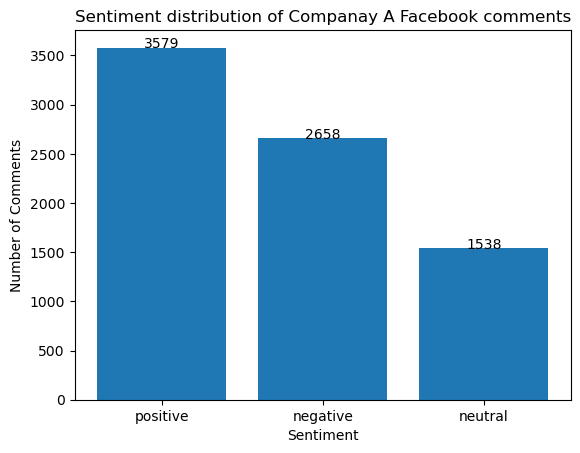

In [58]:
# Create a bar chart of the sentiment distribution
plt.bar(df_telecome_new['sentiment'].unique(), df_telecome_new['sentiment'].value_counts())
add_labels(df_telecome_new['sentiment'].unique(),df_telecome_new['sentiment'].value_counts())
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Sentiment distribution of Companay A Facebook comments')
plt.show()

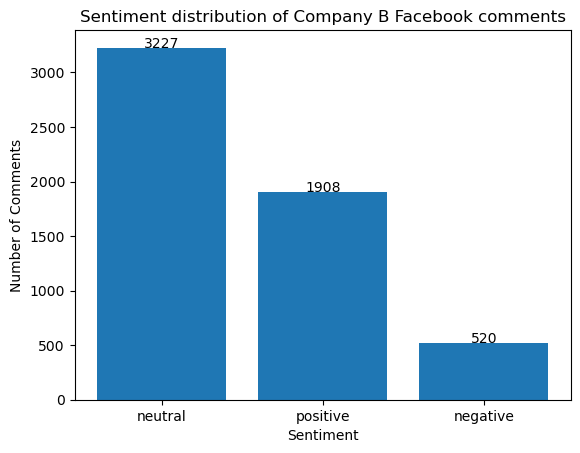

In [64]:
plt.bar(df_mtc_new['sentiment'].unique(), df_mtc_new['sentiment'].value_counts())
add_labels(df_mtc_new['sentiment'].unique(),df_mtc_new['sentiment'].value_counts())
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Sentiment distribution of Company B Facebook comments')
plt.show()

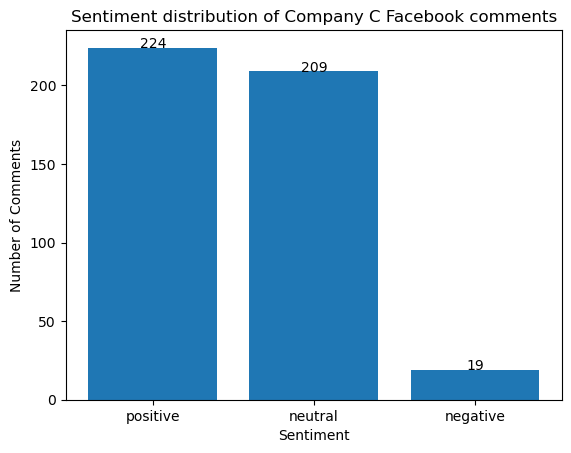

In [65]:
plt.bar(df_paratus_new['sentiment'].unique(), df_paratus_new['sentiment'].value_counts())
add_labels(df_paratus_new['sentiment'].unique(),df_paratus_new['sentiment'].value_counts())
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Sentiment distribution of Company C Facebook comments')
plt.show()

    3.1 Pie Chart

Text(0.5, 1.0, 'Sentiment distribution of Company A Facebook comments ')

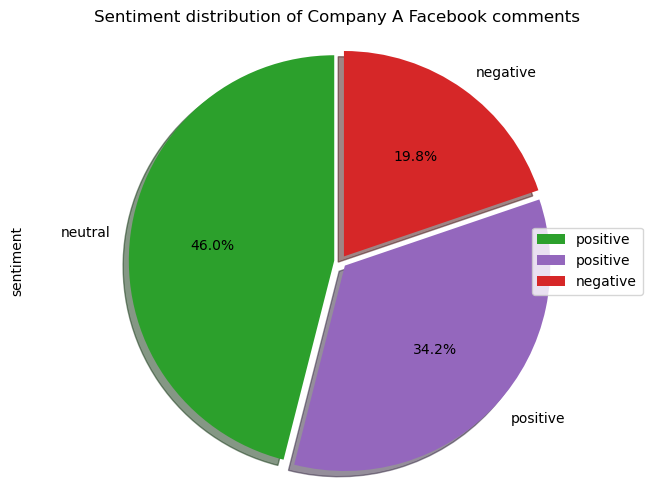

In [61]:
df_telecome_new.sentiment.value_counts().plot(kind='pie',subplots=True,
                                             figsize=(8, 6),
                                             autopct='%1.1f%%',
                                             colors = [ '#2ca02c', '#9467bd','#d62728'],
                                             shadow=True,
                                             explode = (0.03, 0.03, 0.03),
                                             startangle=90)
cases = df_telecome_new['sentiment']

plt.legend(cases, loc="center right")
plt.axis('equal')
plt.title('Sentiment distribution of Company A Facebook comments ')

Text(0.5, 1.0, 'Sentiment distribution of Company B Facebook comments ')

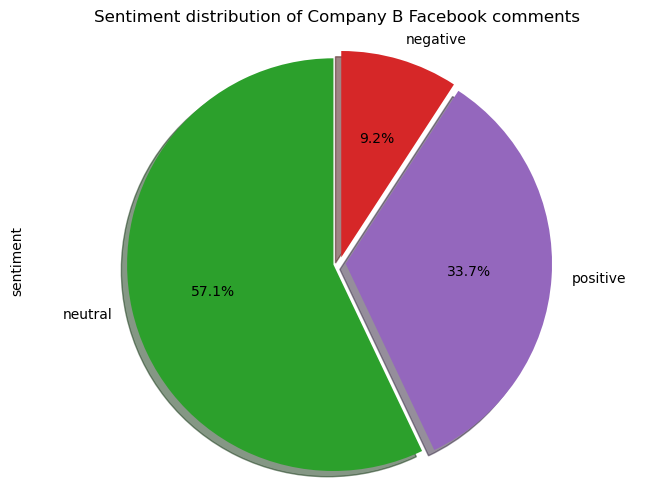

In [62]:
df_mtc_new.sentiment.value_counts().plot(kind='pie',subplots=True,
                                             figsize=(8, 6),
                                             autopct='%1.1f%%',
                                             shadow=True,
                                             colors = [ '#2ca02c', '#9467bd','#d62728'],
                                             explode = (0.03, 0.03, 0.03),
                                             startangle=90)
plt.axis('equal')
plt.title('Sentiment distribution of Company B Facebook comments ')

Text(0.5, 1.0, 'Sentiment distribution of Company C Facebook comments ')

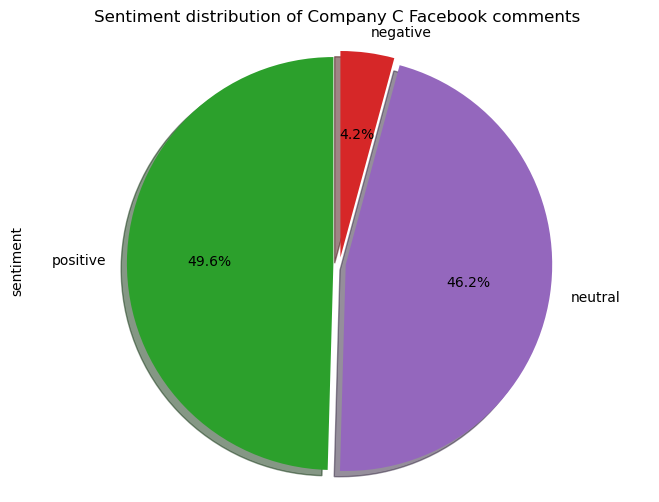

In [63]:
df_paratus_new.sentiment.value_counts().plot(kind='pie',subplots=True,
                                             figsize=(8, 6),
                                             autopct='%1.1f%%',
                                             shadow=True,
                                             colors = [ '#2ca02c', '#9467bd','#d62728'],
                                             explode = (0.03, 0.03, 0.03),
                                             startangle=90)
plt.axis('equal')
plt.title('Sentiment distribution of Company C Facebook comments ')